Carlos Artur Guimarães

Aula Adaptada do professor Leonardo Bezerra, source: [Link](https://github.com/leobezerra/pandas-zero/tree/master/pt-br)

# Concatenando múltiplas bases



Em algumas situações, a informação que se precisa está dividida em bases de dados com formato idêntico. 

Nesses casos, podemos **concatenar** essas bases. 

O exemplo a seguir investiga a diversidade nos cursos da UFRN.

Nossa fonte de informação para este exemplo são os datasets sobre discentes ingressantes na UFRN, que estão organizados por ano de ingresso. 

## Coletando os dados

O primeiro passo quando temos bases de diferentes fontes é coletá-las da forma o mais automatizada possível.

Neste exemplo, organizamos os links para os dados de discentes em um dicionário.

No exemplo a seguir, cada chave é um ano e seu valor associado é o link para o dataset correspondente:

In [1]:
csv_discentes = {
    2019: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/a55aef81-e094-4267-8643-f283524e3dd7/download/discentes-2019.csv",
    2018: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/146b749b-b9d0-49b2-b114-ac6cc82a4051/download/discentes-2018.csv",
    2017: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dc732572-a51a-4d4a-a39d-2db37cbe5382/download/discentes-2017.csv",
    2016: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/7d2fa5b3-743f-465f-8450-91719b34a002/download/discentes-2016.csv",
    2015: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/e2b5b843-4f58-497e-8979-44daf8df8f94/download/discentes-2015.csv",
    2014: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/6c23a430-9a7c-4d0f-9602-1d5d97d40e6a/download/discentes-2014.csv",
}

Podemos consumir cada um desses datasets usando o método `pd.read_csv()`.

O Python permite que esse método seja aplicado a todos os links em sequência usando **compreensão de listas**, com a notação:

```python3
pd.read_csv(dicionário[chave]) for chave in dicionário
```

Entendendo o código acima, pedimos que o Python aplique o método `pd.read_csv(dicionário[chave])` para cada chave presente no dicionário.

A lista produzida contém um `DataFrame` para cada ano.

O método `pd.concat()` combina todos esses dataframes em um só:

In [2]:
import pandas as pd

In [3]:
dados = pd.concat(pd.read_csv(csv_discentes[ano], sep=";") for ano in csv_discentes)
dados

,matricula,nome_discente,sexo,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,20193012209,ABDENOR BEZERRA DOS SANTOS,M,2019,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
1,20190088900,ABDIAS MONTEIRO DE ANDRADE MELO,M,2019,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,111635060.0,HISTÓRIA,PRESENCIAL,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
2,20190127606,ABDIAS SABINO RODRIGUES FILHO,M,2019,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,111635060.0,HISTÓRIA,PRESENCIAL,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
3,20195001008,ABEL GOMES DE OLIVEIRA FILHO,M,2019,1.0,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,112718836.0,CURSO DE LÍNGUA BRASILEIRA DE SINAIS (LIBRAS),PRESENCIAL,6042.0,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTU...",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
4,20190032217,ABI AMANA DE AQUINO BEZERRA,F,2019,2.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,119512361.0,COMUNICAÇÃO SOCIAL - AUDIOVISUAL,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20601,2014069672,ZUEZYO COSTA DUTRA,M,2014,2.0,SiSU,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,104831949.0,MEDICINA,PRESENCIAL,7278.0,ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO G...,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
20602,2014124649,ZULEIKA DANTAS DO VALE TAVARES,F,2014,2.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,CONCLUÍDO,E,MESTRADO,88211810.0,MESTRADO PROFISSIONAL EM SAÚDE DA FAMÍLIA,PRESENCIAL,6135.0,PROGRAMA DE PÓS-GRADUAÇÃO EM SAÚDE DA FAMÍLIA ...,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
20603,2014049400,ZULMARA ANGELA DE AZEVEDO OLIVEIRA,F,2014,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000019.0,DIREITO,PRESENCIAL,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
20604,2014502053,ZURYELL COSTA DUTRA,M,2014,1.0,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,86979169.0,CURSO DE LÍNGUA INGLESA  BÁSICO,PRESENCIAL,6042.0,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTU...",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"


Agora que já unimos os datasets, vamos salvá-lo para não precisarmos refazer esse processo a cada vez.

Uma das formas de **persistir** um `DataFrame` é usar o método `to_csv()` que salva os dados em um arquivo CSV:

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dados.to_csv("/content/drive/My Drive/discentes-ufrn-2014-2019.csv", index=False)

## Avaliando a diversidade no IMD

Começamos nossa análise pelos dados do IMD.

Fazemos essa seleção filtrando pelo campo `nome_unidade`:

In [7]:
dados_imd = dados.query("nome_unidade == 'INSTITUTO METROPOLE DIGITAL'")
dados_imd.shape

(10080, 17)

Uma operação bastante comum em bancos de dados é calcular estatísticas que exigem **agrupar** os dados.

No Pandas, podemos fazer isso usando o método `groupby()` dos objetos do tipo `DataFrame`.

O exemplo a seguir calcula a quantidade de observações por ano, isto é, a quantidade de ingressantes nos cursos do IMD entre 2014 e 2019.

Antes, no entanto, precisamos verificar se há **dados faltando** nesta coluna:

In [8]:
dados_imd.isnull().sum()

matricula               0
nome_discente           0
sexo                    0
ano_ingresso            0
periodo_ingresso        0
forma_ingresso          0
tipo_discente           0
status                  0
sigla_nivel_ensino      0
nivel_ensino            0
id_curso                0
nome_curso              0
modalidade_educacao     0
id_unidade              0
nome_unidade            0
id_unidade_gestora      0
nome_unidade_gestora    0
dtype: int64

Como não temos dados faltando, podemos prosseguir com a análise:

In [9]:
dados_imd.groupby("ano_ingresso").size()

ano_ingresso
2014    1809
2015    1885
2016    1728
2017    2382
2018    1140
2019    1136
dtype: int64

Também podemos fazer agrupamentos considerando múltiplas características dos dados:

In [10]:
dados_imd.groupby(["nome_curso","ano_ingresso","sexo"]).size()

nome_curso                                                                      ano_ingresso  sexo 
CURSO TÉCNICO DA METRÓPOLE DIGITAL                                              2014          F         408
                                                                                              M        1127
                                                                                2015          F         405
                                                                                              M        1116
                                                                                              false       1
                                                                                2016          F         302
                                                                                              M        1028
                                                                                2017          F         709
                                    

Para verificar existência de **dados inválidos**, precisaremos nos assegurar que fiquem no dataframe apenas observações que respeitem as possibilidades disponíveis para esta característica: 

In [11]:
dados_imd = dados_imd.query("sexo in ['M','F']")
dados_imd.shape

(10078, 17)

In [12]:
dados_imd.groupby(["nome_curso","ano_ingresso","sexo"]).size()

nome_curso                                                                      ano_ingresso  sexo
CURSO TÉCNICO DA METRÓPOLE DIGITAL                                              2014          F        408
                                                                                              M       1127
                                                                                2015          F        405
                                                                                              M       1116
                                                                                2016          F        302
                                                                                              M       1028
                                                                                2017          F        709
                                                                                              M       1268
                                             

Vamos restringir nossa análise ao Bacharelado em Tecnologia da Informação (BTI).

Fazemos isso filtrando os dados pela característica `nome_curso`:

In [13]:
dados_bti = dados_imd.query("nome_curso == 'TECNOLOGIA DA INFORMAÇÃO'")

In [14]:
agregado_bti = dados_bti.groupby(["ano_ingresso","sexo"]).size()
agregado_bti

ano_ingresso  sexo
2014          F        28
              M       245
2015          F        39
              M       294
2016          F        31
              M       318
2017          F        28
              M       303
2018          F        44
              M       297
2019          F        35
              M       314
dtype: int64

Como a quantidade de ingressantes por ano varia, comparar anos diferentes só é possível em termos relativos.

Para isso, o Pandas oferece o método `crosstab`, cuja opção `normalize` determina se a contagem de frequência será normalizada ou não e como. 

Neste caso, informamos que a normalização seja feita pela característica listada horizontalmente (índices):

In [15]:
percentual_bti = pd.crosstab(dados_bti["ano_ingresso"], dados_bti["sexo"], normalize="index")
percentual_bti

sexo,F,M
ano_ingresso,,
2014,0.102564,0.897436
2015,0.117117,0.882883
2016,0.088825,0.911175
2017,0.084592,0.915408
2018,0.129032,0.870968
2019,0.100287,0.899713


Note que agora a soma de cada valor possível para a característica `sexo` em um dado ano é igual a 1 (que representa 100% dos dados daquele ano).

Não estamos muito bem em diversidade no BTI, hein? :(
    
Vamos gerar um gráfico de linhas para visualizar a evolução dessa (falta de) diversidade ao longo dos anos considerados.

Para isso, além da `matplotlib`, vamos precisar da bibioteca `seaborn`.

Por convenção, importamos a biblioteca `seaborn` como `sns` e usamos o método `set()` para ativar suas configurações padrão.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Produzimos o gráfico de linha usando o método `lineplot`, onde devemos informar através do argumento `data` os dados que pretendemos plotar.

Além disso, vamos associar um nome ao gráfico de linha para poder configurar o intervalo usado no eixo y através do método `set(ylim=(início, fim))`:

Text(0.5, 1.0, 'Discentes do sexo feminino por ano de ingresso')

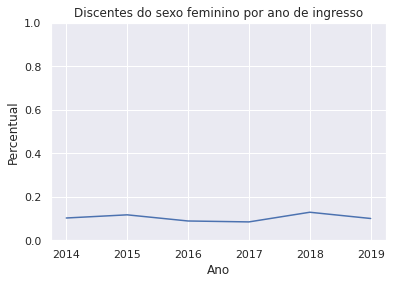

In [17]:
percentual_bti_feminino = percentual_bti["F"]
plot_bti = sns.lineplot(data=percentual_bti_feminino)
plot_bti.set(ylim=(0,1))
plt.xlabel("Ano")
plt.ylabel("Percentual")
plt.title("Discentes do sexo feminino por ano de ingresso")

## Avaliando os cursos associados ao BTI

O dado acima claramente é insatisfatório, mas precisamos analisá-lo em perspectiva.

Vamos compará-lo inicialmente com cursos de segundo ciclo que se seguem ao BTI:

In [18]:
cursos_ti = ["TECNOLOGIA DA INFORMAÇÃO","ENGENHARIA DE SOFTWARE","CIÊNCIA DA COMPUTAÇÃO"]
dados_ti = dados.query(f"nome_curso in {cursos_ti}")

Para começar, vamos conferir se os valores presentes neste dataframe respeitam as possibilidades elencadas para a característica `sexo`:

In [19]:
dados_ti.isnull().sum()

matricula               0
nome_discente           0
sexo                    0
ano_ingresso            0
periodo_ingresso        0
forma_ingresso          0
tipo_discente           0
status                  0
sigla_nivel_ensino      0
nivel_ensino            0
id_curso                0
nome_curso              0
modalidade_educacao     0
id_unidade              0
nome_unidade            0
id_unidade_gestora      0
nome_unidade_gestora    0
dtype: int64

In [20]:
dados_ti.sexo.unique()

array(['M', 'F', 'false'], dtype=object)

Agora podemos calcular os valores absolutos e relativos para cada um desses cursos:

In [21]:
agregado_ti = dados_ti.groupby(['nome_curso','ano_ingresso','sexo']).size()
agregado_ti

nome_curso                ano_ingresso  sexo 
CIÊNCIA DA COMPUTAÇÃO     2016          F          1
                                        M          3
                          2017          F          3
                                        M         11
                          2018          F          6
                                        M         21
                          2019          M         11
ENGENHARIA DE SOFTWARE    2016          F          1
                                        M          5
                          2017          F          3
                                        M         13
                          2018          F          2
                                        M         26
                          2019          F          6
                                        M         21
TECNOLOGIA DA INFORMAÇÃO  2014          F         28
                                        M        245
                                        false      1


In [22]:
percentual_ti = pd.crosstab([dados_ti['nome_curso'], dados_ti['ano_ingresso']], dados_ti['sexo'], normalize="index")
percentual_ti

sexo                                          F         M    false
nome_curso               ano_ingresso                             
CIÊNCIA DA COMPUTAÇÃO    2016          0.250000  0.750000  0.00000
                         2017          0.214286  0.785714  0.00000
                         2018          0.222222  0.777778  0.00000
                         2019          0.000000  1.000000  0.00000
ENGENHARIA DE SOFTWARE   2016          0.166667  0.833333  0.00000
                         2017          0.187500  0.812500  0.00000
                         2018          0.071429  0.928571  0.00000
                         2019          0.222222  0.777778  0.00000
TECNOLOGIA DA INFORMAÇÃO 2014          0.102190  0.894161  0.00365
                         2015          0.117117  0.882883  0.00000
                         2016          0.088825  0.911175  0.00000
                         2017          0.084592  0.915408  0.00000
                         2018          0.129032  0.870968  0.00000
                         2019          0.100287  0.899713  0.00000

Note que para os cursos de ciência da computação e engenharia de software, não há dados para os anos de 2014 e 2015. 

Além disso, não houve ingresso de discentes do sexo feminino em ciência da computação no ano de 2019.

Vamos então considerar os dados para o sexo masculino a partir de 2016:

In [23]:
percentual_ti_masculino = percentual_ti.query("ano_ingresso >= 2016")["M"]
percentual_ti_masculino

nome_curso                ano_ingresso
CIÊNCIA DA COMPUTAÇÃO     2016            0.750000
                          2017            0.785714
                          2018            0.777778
                          2019            1.000000
ENGENHARIA DE SOFTWARE    2016            0.833333
                          2017            0.812500
                          2018            0.928571
                          2019            0.777778
TECNOLOGIA DA INFORMAÇÃO  2016            0.911175
                          2017            0.915408
                          2018            0.870968
                          2019            0.899713
Name: M, dtype: float64

Uma série produzida a partir de um agrupamento de múltiplas características apresenta um índice hierárquico.

O Pandas permite converter uma série assim em um dataframe usando o método `reset_index()`.

Os nomes das colunas são reutilizados do índice hierárquico. A última coluna pode ser nomeada usando o argumento `name`):

In [24]:
dados_ti_masculino = percentual_ti_masculino.reset_index(name="total")
dados_ti_masculino

,nome_curso,ano_ingresso,total
0,CIÊNCIA DA COMPUTAÇÃO,2016,0.750000
1,CIÊNCIA DA COMPUTAÇÃO,2017,0.785714
2,CIÊNCIA DA COMPUTAÇÃO,2018,0.777778
3,CIÊNCIA DA COMPUTAÇÃO,2019,1.000000
4,ENGENHARIA DE SOFTWARE,2016,0.833333
5,ENGENHARIA DE SOFTWARE,2017,0.812500
6,ENGENHARIA DE SOFTWARE,2018,0.928571
7,ENGENHARIA DE SOFTWARE,2019,0.777778
8,TECNOLOGIA DA INFORMAÇÃO,2016,0.911175
9,TECNOLOGIA DA INFORMAÇÃO,2017,0.915408


Com os dados organizados, podemos agora calcular a média de participação masculina nos cursos associados ao BTI considerando o período 2016-2019:

In [25]:
dados_ti_masculino.groupby("nome_curso").mean()

,ano_ingresso,total
nome_curso,,
CIÊNCIA DA COMPUTAÇÃO,2017.5,0.828373
ENGENHARIA DE SOFTWARE,2017.5,0.838046
TECNOLOGIA DA INFORMAÇÃO,2017.5,0.899316


Note que também está sendo calculada a média da coluna `ano_ingresso`.

Isso acontece porque, ao ler os datasets da UFRN, o Pandas entendeu que deveria configurar esta coluna como numérica.

Se quisermos impedir isso, devemos solicitar ao Pandas que trate essa coluna como uma característica ordinal:

In [26]:
dados_ti_masculino.ano_ingresso = dados_ti_masculino.ano_ingresso.astype(str)
dados_ti_masculino.groupby("nome_curso").mean()

,total
nome_curso,
CIÊNCIA DA COMPUTAÇÃO,0.828373
ENGENHARIA DE SOFTWARE,0.838046
TECNOLOGIA DA INFORMAÇÃO,0.899316


Na média, os três cursos apresentam diversidade insatisfatória. No entanto, fica claro que os cursos de segundo ciclo apresentam uma situação menos crítica que o BTI.

Vamos olhar a evolução deste fator nos três cursos usando o `lineplot()` mais uma vez.

Neste exemplo, vamos configurar o tamanho do gráfico usando o método `plt.figure(figsize=(largura, altura))`.

Text(0.5, 1.0, 'Discentes do sexo masculino por ano de ingresso')

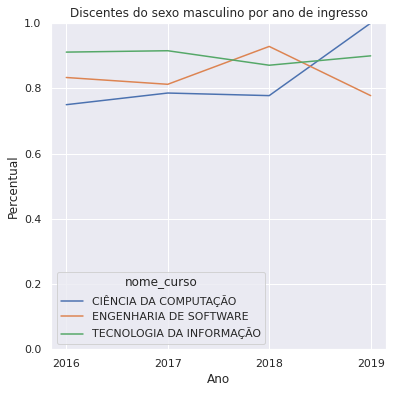

In [27]:
plt.figure(figsize=(6, 6))
plot_it = sns.lineplot(x="ano_ingresso", y="total", hue="nome_curso", data=dados_ti_masculino)
plot_it.set(ylim=(0,1))
plt.xlabel("Ano")
plt.ylabel("Percentual")
plt.title("Discentes do sexo masculino por ano de ingresso")

## Avaliando a diversidade na UFRN

Como podemos ver, a diversidade nos cursos relacionados ao BTI não anda bem.

Mas será que essa é a realidade mais geral da UFRN?

Vamos expandir nossa análise para considerar todas as unidades acadêmicas da universidade.

Novamente, começamos verificando a existência de dados faltando:

In [28]:
dados.isnull().sum()

matricula                  0
nome_discente              0
sexo                       0
ano_ingresso               0
periodo_ingresso         244
forma_ingresso           222
tipo_discente              0
status                     0
sigla_nivel_ensino         0
nivel_ensino               0
id_curso                8632
nome_curso              8632
modalidade_educacao     8632
id_unidade              8632
nome_unidade            8632
id_unidade_gestora      8632
nome_unidade_gestora    8632
dtype: int64

Quando identificamos a ausência de dados, podemos tentar preenchê-los ou descartar as observações afetadas.

Pela elevada quantidade de dados faltando, tentar preencher esses dados se torna difícil.

Assim, vamos optar por analisar apenas os casos em que o nome da unidade foi informada:

In [29]:
dados_não_nulos = dados[~dados["nome_unidade"].isnull()]

Outro recorte importante é limitar nossa análise a cursos de graduação:

In [30]:
dados_graduação = dados_não_nulos.query("nivel_ensino == 'GRADUAÇÃO'")

Após esses filtros, vamos ver quantas unidades restaram.

Podemos fazer isso usando o procedimento `len`, que conta a quantidade de elementos em uma lista:

In [31]:
nomes_unidades = dados_graduação["nome_unidade"].unique()
len(nomes_unidades)

16

In [32]:
nomes_unidades

array(['CENTRO DE  ENSINO SUPERIOR DO SERIDÓ',
       'CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES',
       'CENTRO DE CIÊNCIAS DA SAÚDE',
       'CENTRO DE CIÊNCIAS EXATAS E DA TERRA',
       'ESCOLA DE CIÊNCIAS E TECNOLOGIA',
       'CENTRO DE CIÊNCIAS SOCIAIS APLICADAS',
       'INSTITUTO METROPOLE DIGITAL',
       'FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA',
       'CENTRO DE EDUCAÇÃO', 'ESCOLA DE MÚSICA', 'CENTRO DE TECNOLOGIA',
       'CENTRO DE BIOCIÊNCIAS', 'ESCOLA AGRÍCOLA DE JUNDIAÍ',
       'ESCOLA DE SAÚDE',
       'ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE',
       'FACULDADE DE ENGENHARIA, LETRAS E CIÊNCIAS SOCIAIS DO SERIDÓ - FELCS'],
      dtype=object)

Ainda no etapa de validação de dados, vamos ver se há dados inválidos na característica `sexo`.

Podemos fazer isso usando o procedimento `all(condição)`, que avalia se não houve quebra da condição informada: 

In [33]:
condição_sexo = dados_graduação["sexo"].isin(["M","F"])
all(condição_sexo)

False

Mantemos, então, apenas as entradas válidas:

In [34]:
dados_graduação = dados_graduação[condição_sexo]

Baseado nas experiências anteriores, qual o próximo passo em nossa análise?

In [35]:
percentual_graduação = pd.crosstab(dados_graduação["nome_unidade"], dados_graduação["sexo"], normalize="index")
percentual_graduação

sexo,F,M
nome_unidade,,
CENTRO DE ENSINO SUPERIOR DO SERIDÓ,0.448145,0.551855
CENTRO DE BIOCIÊNCIAS,0.555275,0.444725
CENTRO DE CIÊNCIAS DA SAÚDE,0.592516,0.407484
CENTRO DE CIÊNCIAS EXATAS E DA TERRA,0.310626,0.689374
"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",0.494932,0.505068
CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,0.465544,0.534456
CENTRO DE EDUCAÇÃO,0.767807,0.232193
CENTRO DE TECNOLOGIA,0.322289,0.677711
ESCOLA AGRÍCOLA DE JUNDIAÍ,0.382543,0.617457


Vamos isolar apenas os dados referentes ao público feminino.

Além disto, vamos ordenar estes valores em ordem crescente usando o método `sort_values()`:

In [36]:
dados_graduação_feminino = percentual_graduação["F"].sort_values()
dados_graduação_feminino

nome_unidade
INSTITUTO METROPOLE DIGITAL                                             0.103745
ESCOLA DE CIÊNCIAS E TECNOLOGIA                                         0.230393
ESCOLA DE MÚSICA                                                        0.257212
CENTRO DE CIÊNCIAS EXATAS E DA TERRA                                    0.310626
CENTRO DE TECNOLOGIA                                                    0.322289
ESCOLA AGRÍCOLA DE JUNDIAÍ                                              0.382543
ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE            0.437500
CENTRO DE  ENSINO SUPERIOR DO SERIDÓ                                    0.448145
CENTRO DE CIÊNCIAS SOCIAIS APLICADAS                                    0.465544
CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES                              0.494932
CENTRO DE BIOCIÊNCIAS                                                   0.555275
FACULDADE DE ENGENHARIA, LETRAS E CIÊNCIAS SOCIAIS DO SERIDÓ - FELCS    0.579247
CENTRO DE CIÊNC

Os valores mínimo e máximo para o percentual de mulheres estão bastante separados.

Vamos dar uma olhada em estatísticas descritivas sobre essa série:

In [37]:
dados_graduação_feminino.describe()

count    16.000000
mean      0.459665
std       0.186923
min       0.103745
25%       0.319373
50%       0.456845
75%       0.582565
max       0.767807
Name: F, dtype: float64

A média e a mediana encontram-se próximas a 50%, o que é um dado interessante.

No entanto, o desvio padrão de 20% é bastante elevado.

Vamos ver quais cursos ficaram abaixo do primeiro quartil:

In [38]:
dados_graduação_feminino[dados_graduação_feminino <= dados_graduação_feminino.quantile(0.25)]

nome_unidade
INSTITUTO METROPOLE DIGITAL             0.103745
ESCOLA DE CIÊNCIAS E TECNOLOGIA         0.230393
ESCOLA DE MÚSICA                        0.257212
CENTRO DE CIÊNCIAS EXATAS E DA TERRA    0.310626
Name: F, dtype: float64

Em geral, são cursos relacionados a ciências exatas, engenharia e tecnologias. 

Essa é uma realidade conhecida, mas surpreende que cursos de música também estejam nesse grupo.

E quais ficaram acima do terceiro quartil?

In [39]:
dados_graduação_feminino[dados_graduação_feminino >= dados_graduação_feminino.quantile(0.75)]

nome_unidade
CENTRO DE CIÊNCIAS DA SAÚDE                          0.592516
ESCOLA DE SAÚDE                                      0.698444
FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA    0.708417
CENTRO DE EDUCAÇÃO                                   0.767807
Name: F, dtype: float64

Cursos da área de sáude e educação, outra realidade assimilada na universidade.

Para termos a visão completa, vamos usar o método `distplot` do seaborn para analisar a distribuição dos dados e compará-la com uma distribuição normal.

Para isso, precisaremos do método norm do da biblioteca `scipy`:

In [40]:
from scipy.stats import norm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Discentes de graduação do sexo feminino por unidade acadêmica')

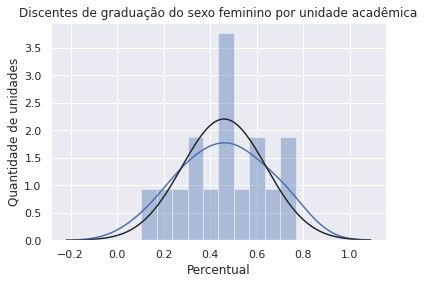

In [41]:
sns.distplot(dados_graduação_feminino, fit=norm, bins=10)
plt.ylabel("Quantidade de unidades")
plt.xlabel("Percentual")
plt.title("Discentes de graduação do sexo feminino por unidade acadêmica")

Entendendo o código acima, a opção `fit=norm` gera a distribuição normal de referência para comparação, em preto.

Por sua vez, a opção `bins=10` configura quantos intervalos serão considerados pelo histograma.

Interpretando o gráfico, chegamos à hipotese de que haja três grandes grupos de cursos, sendo que apenas um representa uma situação de diversidade.

Vamos tentar avaliar essa hipótese com um maior refinamento, partindo para uma análise dos cursos da UFRN:

In [42]:
len(dados_graduação["nome_curso"].unique())

81

Aqui cabe uma ressalva: os datasets apontam 82 nomes de cursos diferentes, mas existem mais de 120 cursos de graduação na UFRN.

O motivo para o número menor é que cursos de licenciatura e bacharelado não são distinguidos pelo nome nestes datasets.

Continuando nossa análise:

In [43]:
percentual_cursos = pd.crosstab(dados_graduação["nome_curso"], dados_graduação["sexo"], normalize="index")
percentual_cursos

sexo,F,M
nome_curso,,
ADMINISTRAÇÃO,0.421310,0.578690
ADMINISTRAÇÃO PÚBLICA,0.405000,0.595000
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,0.196970,0.803030
ARQUITETURA E URBANISMO,0.680451,0.319549
ARTES VISUAIS,0.585551,0.414449
...,...,...
SISTEMAS DE INFORMAÇÃO,0.163194,0.836806
TEATRO,0.452586,0.547414
TECNOLOGIA DA INFORMAÇÃO,0.103745,0.896255


Selecionando apenas os dados para o público feminino e os ordenando:

In [44]:
dados_cursos_feminino = percentual_cursos["F"].sort_values()
dados_cursos_feminino

nome_curso
TECNOLOGIA DA INFORMAÇÃO          0.103745
ENGENHARIA DE TELECOMUNICAÇÕES    0.117647
ENGENHARIA MECATRÔNICA            0.139535
ENGENHARIA DE SOFTWARE            0.155844
ENGENHARIA DE COMPUTAÇÃO          0.159664
                                    ...   
PEDAGOGIA                         0.779475
NUTRIÇÃO                          0.790219
FONOAUDIOLOGIA                    0.852140
SERVIÇO SOCIAL                    0.871022
LETRAS -                          0.875000
Name: F, Length: 81, dtype: float64

Novamente, cursos de engenharias, tecnologia, saúde e educação aparecem como os menos diversos.

Vamos analisar algumas estatísticas descritivas dessa série:

In [45]:
dados_cursos_feminino.describe()

count    81.000000
mean      0.462116
std       0.193863
min       0.103745
25%       0.321608
50%       0.452586
75%       0.604478
max       0.875000
Name: F, dtype: float64

Mais uma vez, a média e o desvio padrão estão próximas a 50% e o desvio padrão na casa de 20%.

Vamos ver quais os cursos abaixo do primeiro quartil:

In [46]:
dados_cursos_feminino[dados_cursos_feminino <= dados_cursos_feminino.quantile(0.25)]

nome_curso
TECNOLOGIA DA INFORMAÇÃO                 0.103745
ENGENHARIA DE TELECOMUNICAÇÕES           0.117647
ENGENHARIA MECATRÔNICA                   0.139535
ENGENHARIA DE SOFTWARE                   0.155844
ENGENHARIA DE COMPUTAÇÃO                 0.159664
SISTEMAS DE INFORMAÇÃO                   0.163194
ENGENHARIA ELÉTRICA                      0.164407
ENGENHARIA MECÂNICA                      0.173913
CIÊNCIA DA COMPUTAÇÃO                    0.178571
FÍSICA                                   0.189614
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS    0.196970
CIÊNCIAS ECONÔMICAS                      0.227929
CIÊNCIAS E TECNOLOGIA                    0.230393
MATEMÁTICA                               0.255869
MÚSICA                                   0.257212
ENGENHARIA CIVIL                         0.274194
EDUCAÇÃO FÍSICA                          0.309877
ENGENHARIA DE PRODUÇÃO                   0.311419
CIÊNCIAS ATUARIAIS                       0.316406
ENGENHARIA AGRONÔMICA                  

De fato, o único novo insight que obtemos é a presença do curso de educação física neste grupo, uma exceção entre os cursos de saúde.

Vamos ver agora os cursos acima do terceiro quartil:

In [47]:
dados_cursos_feminino[dados_cursos_feminino >= dados_cursos_feminino.quantile(0.75)]

nome_curso
LETRAS                                    0.604478
BIBLIOTECONOMIA                           0.612245
ODONTOLOGIA                               0.615527
DANÇA                                     0.617647
LETRAS - LÍNGUA PORTUGUESA                0.626357
LETRAS- LÍNGUA ESPANHOLA E LITERATURAS    0.628000
BIOMEDICINA                               0.645740
FISIOTERAPIA                              0.661017
PSICOLOGIA                                0.679558
SAÚDE COLETIVA                            0.680000
ARQUITETURA E URBANISMO                   0.680451
GESTÃO HOSPITALAR                         0.698444
LETRAS - LÍNGUA ESPANHOLA                 0.702020
LETRAS - PORTUGUÊS E INGLÊS               0.720000
ENFERMAGEM                                0.754028
LETRAS - LÍNGUA PORTUGUESA E LIBRAS       0.759615
PEDAGOGIA                                 0.779475
NUTRIÇÃO                                  0.790219
FONOAUDIOLOGIA                            0.852140
SERVIÇO SOCIAL      

Aqui vemos mais uma exceção, com arquitetura e urbanismo neste grupo.

Além disso, chama a atenção a presença de cursos de Letra, considerando que sua unidade responsável apresenta proporção quase igualitária entre discentes homens e mulheres. 

Para finalizar, vamos usar o `distplot` e comparamos a distribuição dos dados com uma distribuição normal:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Discentes de graduação do sexo feminino por curso')

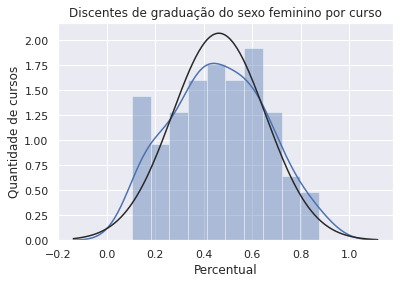

In [48]:
sns.distplot(dados_cursos_feminino, fit=norm, bins=10)
plt.ylabel("Quantidade de cursos")
plt.xlabel("Percentual")
plt.title("Discentes de graduação do sexo feminino por curso")

Neste caso, notamos uma distribuição bem mais aproximada da normal.

No entanto, há um pico considerável na extremidade inferior do eixo x.

No geral, podemos dizer que a diversidade na universidade está em uma situação melhor do que a diversidade nos cursos da universidade.

Em outras palavras, diferentes perfis encontrarão cursos para lhes atender, mas poucos cursos atenderão os diferentes perfis.